# Description
[Colab link](https://colab.research.google.com/drive/1cIHLBitjQc3HR0YQLVMV-pPEza_KIOva?usp=sharing)

## a. Task
In this project, you will work on a churn prediction. You will need to predict which customers are going to stop being customers of the bank. You will need to use a multilayer perceptron for your final prediction.

- Baseline. Naive classifier where you use the most popular class for predictions.
- Random forest. Solve the task with the random forest as another baseline solution, use grid search to find optimal hyperparameters.
- Scikit-learn. Solve the task using MLPClassifier.
- Keras. Solve the task using Keras from the TensorFlow library.
- TensorFlow. Solve the task using the TensorFlow library.
- NumPy. Implement the best architecture that you achieved earlier but with NumPy using matrix calculations. You need to train the model and use it for inference (predictions).


## b. Implementation
There are two files: train and test. You will use the train data to fit the models and make predictions for the test dataset.  
You can work in Jupyter Notebooks. The notebooks should be well-formatted. You need to make a split on the train and test (20%) datasets with stratification. You may apply any preprocessing for the data: working with anomalies, missing values, feature generation, and selection. Use a grid search to find the best hyperparameters.

In the last part of the task when you will implement your neural network, please, use OOP principles.

At the end of your notebook(s), you need to create a table with the results of your research where you should display the name of the library, algorithms, hyperparameters, and the score (accuracy and AUC) of the models you used (including baseline solutions). Try to use dropout for model regularization.

## c. Submission
After you finish working with the models, you need to save the final predictions in the CSV-file with only two fields: “ID” and “TARGET”. The order of IDs should be the same as in the test dataset you were given. The values of “TARGET” can be either the class or the probability.

You need to achieve AUC at least equal 0.8183 on the test dataset with a neural network solution. It will be calculated with an automated checker.

Your repository should contain one or several notebooks with your solutions as well as the prediction file.

## d. Bonus part
Try to achieve a better AUC on the test dataset with a neural network solution – 0.83.  
Try to achieve an even better AUC on the test dataset with a neural network solution – 0.85.

# 1. Data preparation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, precision_recall_curve, mean_squared_error

from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from pprint import pprint
from warnings import filterwarnings

filterwarnings("ignore", category=FutureWarning)

In [3]:
df_train = pd.read_csv("data/bank_data_train.csv")

df_train.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [4]:
df_test = pd.read_csv("data/bank_data_test.csv")

df_test.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,400980,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,525062,0,0.059381,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,0.5,0.5,0.0,0.0,0.5,0.5,0.5,NaN
2,280316,0,0.070430,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,496066,0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,375031,0,0.180961,0.0,77.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
df_train.shape

(355190, 116)

## Data cleaning

In [6]:
columns_to_drop = []

In [7]:
def print_useful_rows_info(df):
    """Количество и процент заполненных строк"""
    print('Amount of useful rows:', len(df.dropna()))
    print('Persentage of filled rows', round(len(df.dropna()) / len(df) * 100, 2))

In [8]:
print_useful_rows_info(df_train)

Amount of useful rows: 0
Persentage of filled rows 0.0


### удалим столбцы где пропущено больше 20% значений

In [9]:
df_clean = df_train.replace("", np.nan).dropna(axis=1, thresh=df_train.shape[0]*0.8)
df_clean

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,146841,0,0.000000,0.0,0.000000,0.0,0.541683,0,156067.339767,0.000000,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
1,146842,0,0.041033,0.0,0.244678,0.0,0.000000,0,4278.845817,0.000000,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
2,146843,0,0.006915,0.0,0.000000,0.0,0.000000,0,112837.062817,0.000000,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
3,146844,0,0.000000,0.0,0.000000,0.0,0.005874,0,42902.902883,0.000000,...,1.583333,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0
4,146845,0,0.000000,0.0,0.000000,0.0,0.000000,0,71906.476533,0.000000,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,590822,0,0.000000,0.0,0.000000,0.0,0.000000,0,9697.620867,0.000000,...,8.963872,0.0,0.0,0.659039,0.785714,0.0,0.0,0.0,0.0,0
355186,590823,0,0.000000,0.0,0.000000,0.0,0.000000,0,428380.024733,0.262714,...,8.963872,0.0,0.0,0.652612,0.500000,0.0,0.0,0.0,0.0,0
355187,590825,0,0.041298,0.0,0.095187,0.0,0.000000,0,224884.436700,0.031179,...,8.966560,0.0,0.0,0.448386,0.459530,0.0,0.0,0.0,0.0,0
355188,590826,0,0.000000,0.0,0.000000,0.0,0.000000,0,12080.001833,0.282573,...,8.966560,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0


1 - left  
0 - dont left

In [10]:
print_useful_rows_info(df_clean)

Amount of useful rows: 303194
Persentage of filled rows 85.36


In [11]:
def blank_rows_percentage(df):
  """Вывод колонок и процента пропусков в каждой"""
  print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

In [12]:
blank_rows_percentage(df_clean)

TRANS_AMOUNT_TENDENCY3M     14.638926
TRANS_CNT_TENDENCY3M        14.638926
AMOUNT_RUB_ATM_PRC          10.789437
AMOUNT_RUB_CLO_PRC          10.789437
AMOUNT_RUB_SUP_PRC          10.789437
AMOUNT_RUB_NAS_PRC          10.789437
TRANS_COUNT_SUP_PRC         10.789437
TRANS_COUNT_NAS_PRC         10.789437
TRANS_COUNT_ATM_PRC         10.789437
REST_DYNAMIC_PAYM_3M         0.000000
REST_DYNAMIC_IL_3M           0.000000
TURNOVER_DYNAMIC_IL_3M       0.000000
REST_DYNAMIC_PAYM_1M         0.000000
TURNOVER_DYNAMIC_CUR_3M      0.000000
PACK                         0.000000
CLNT_SETUP_TENOR             0.000000
ID                           0.000000
TURNOVER_DYNAMIC_PAYM_3M     0.000000
TURNOVER_DYNAMIC_PAYM_1M     0.000000
REST_DYNAMIC_CUR_3M          0.000000
REST_DYNAMIC_CC_1M           0.000000
TURNOVER_DYNAMIC_CC_1M       0.000000
REST_DYNAMIC_CC_3M           0.000000
TURNOVER_DYNAMIC_CC_3M       0.000000
TURNOVER_DYNAMIC_CUR_1M      0.000000
CR_PROD_CNT_CCFP             0.000000
LDEAL_GRACE_

In [13]:
df_clean[df_clean['CLNT_SETUP_TENOR']<6].TRANS_CNT_TENDENCY3M.isna().sum()

32938

TRANS_AMOUNT_TENDENCY3M, TRANS_CNT_TENDENCY3M - пропущены у в основном у тех кто является клиентом меньше 6 месяцев  
ПОэтому заполним их стредним значением из выборки

In [14]:
df_clean['TRANS_AMOUNT_TENDENCY3M'] = df_clean['TRANS_AMOUNT_TENDENCY3M'].fillna(df_clean.TRANS_AMOUNT_TENDENCY3M.mean())
df_clean['TRANS_CNT_TENDENCY3M'] = df_clean['TRANS_CNT_TENDENCY3M'].fillna(df_clean.TRANS_CNT_TENDENCY3M.mean())

Остальные пропуски заполним медианой

In [15]:
df_clean['AMOUNT_RUB_ATM_PRC'] = df_clean['AMOUNT_RUB_ATM_PRC'].fillna(df_clean.AMOUNT_RUB_ATM_PRC.median())
df_clean['AMOUNT_RUB_CLO_PRC'] = df_clean['AMOUNT_RUB_CLO_PRC'].fillna(df_clean.AMOUNT_RUB_CLO_PRC.median())
df_clean['AMOUNT_RUB_SUP_PRC'] = df_clean['AMOUNT_RUB_SUP_PRC'].fillna(df_clean.AMOUNT_RUB_SUP_PRC.median())
df_clean['AMOUNT_RUB_NAS_PRC'] = df_clean['AMOUNT_RUB_NAS_PRC'].fillna(df_clean.AMOUNT_RUB_NAS_PRC.median())
df_clean['TRANS_COUNT_SUP_PRC'] = df_clean['TRANS_COUNT_SUP_PRC'].fillna(df_clean.TRANS_COUNT_SUP_PRC.median())
df_clean['TRANS_COUNT_NAS_PRC'] = df_clean['TRANS_COUNT_NAS_PRC'].fillna(df_clean.TRANS_COUNT_NAS_PRC.median())
df_clean['TRANS_COUNT_ATM_PRC'] = df_clean['TRANS_COUNT_ATM_PRC'].fillna(df_clean.TRANS_COUNT_ATM_PRC.median())

In [16]:
print_useful_rows_info(df_clean)

Amount of useful rows: 355190
Persentage of filled rows 100.0


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        355190 non-null  int64  
 1   CR_PROD_CNT_IL            355190 non-null  int64  
 2   AMOUNT_RUB_CLO_PRC        355190 non-null  float64
 3   TURNOVER_DYNAMIC_IL_1M    355190 non-null  float64
 4   AMOUNT_RUB_SUP_PRC        355190 non-null  float64
 5   REST_DYNAMIC_FDEP_1M      355190 non-null  float64
 6   REST_DYNAMIC_SAVE_3M      355190 non-null  float64
 7   CR_PROD_CNT_VCU           355190 non-null  int64  
 8   REST_AVG_CUR              355190 non-null  float64
 9   AMOUNT_RUB_NAS_PRC        355190 non-null  float64
 10  TRANS_COUNT_SUP_PRC       355190 non-null  float64
 11  TRANS_COUNT_NAS_PRC       355190 non-null  float64
 12  CR_PROD_CNT_TOVR          355190 non-null  int64  
 13  CR_PROD_CNT_PIL           355190 non-null  i

In [18]:
df_clean.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
count,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,3.551900e+05,355190.000000,...,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,368794.674875,0.105225,0.039293,0.001305,0.078977,0.000723,0.063400,0.031214,6.635854e+04,0.021384,...,4.377001,0.071906,0.025108,0.582237,0.597247,0.002191,0.000883,0.007309,0.004309,0.081435
std,128148.804566,0.431372,0.103339,0.029118,0.135618,0.014081,0.202963,0.184059,1.878598e+05,0.086059,...,2.936530,0.206863,0.104482,0.260688,0.228327,0.026360,0.027321,0.066681,0.059852,0.273503
min,146841.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.345592,0.000000,0.000000,0.000000,0.005747,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.070440e+03,0.000000,...,1.781187,0.000000,0.000000,0.417991,0.455882,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.000000,0.027117,0.000000,0.000000,0.000000,1.628925e+04,0.000000,...,3.894098,0.000000,0.000000,0.582237,0.597247,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.028539,0.000000,0.095284,0.000000,0.000000,0.000000,5.659516e+04,0.007976,...,6.555388,0.000000,0.000000,0.750901,0.713043,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.202141e+07,1.000000,...,13.748937,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### No duplicates

In [19]:
df_clean.duplicated(keep=False).sum()

0

In [20]:
df_clean.drop('TARGET', axis=1).duplicated(keep=False).sum()

0

### Categorial feature
PACK

In [21]:
df_clean.PACK.value_counts()

102    116986
K01     77083
O01     50478
105     44936
107     27952
103     24860
104      6776
301      4208
101      1816
109        86
M01         7
108         2
Name: PACK, dtype: int64

### Destributions

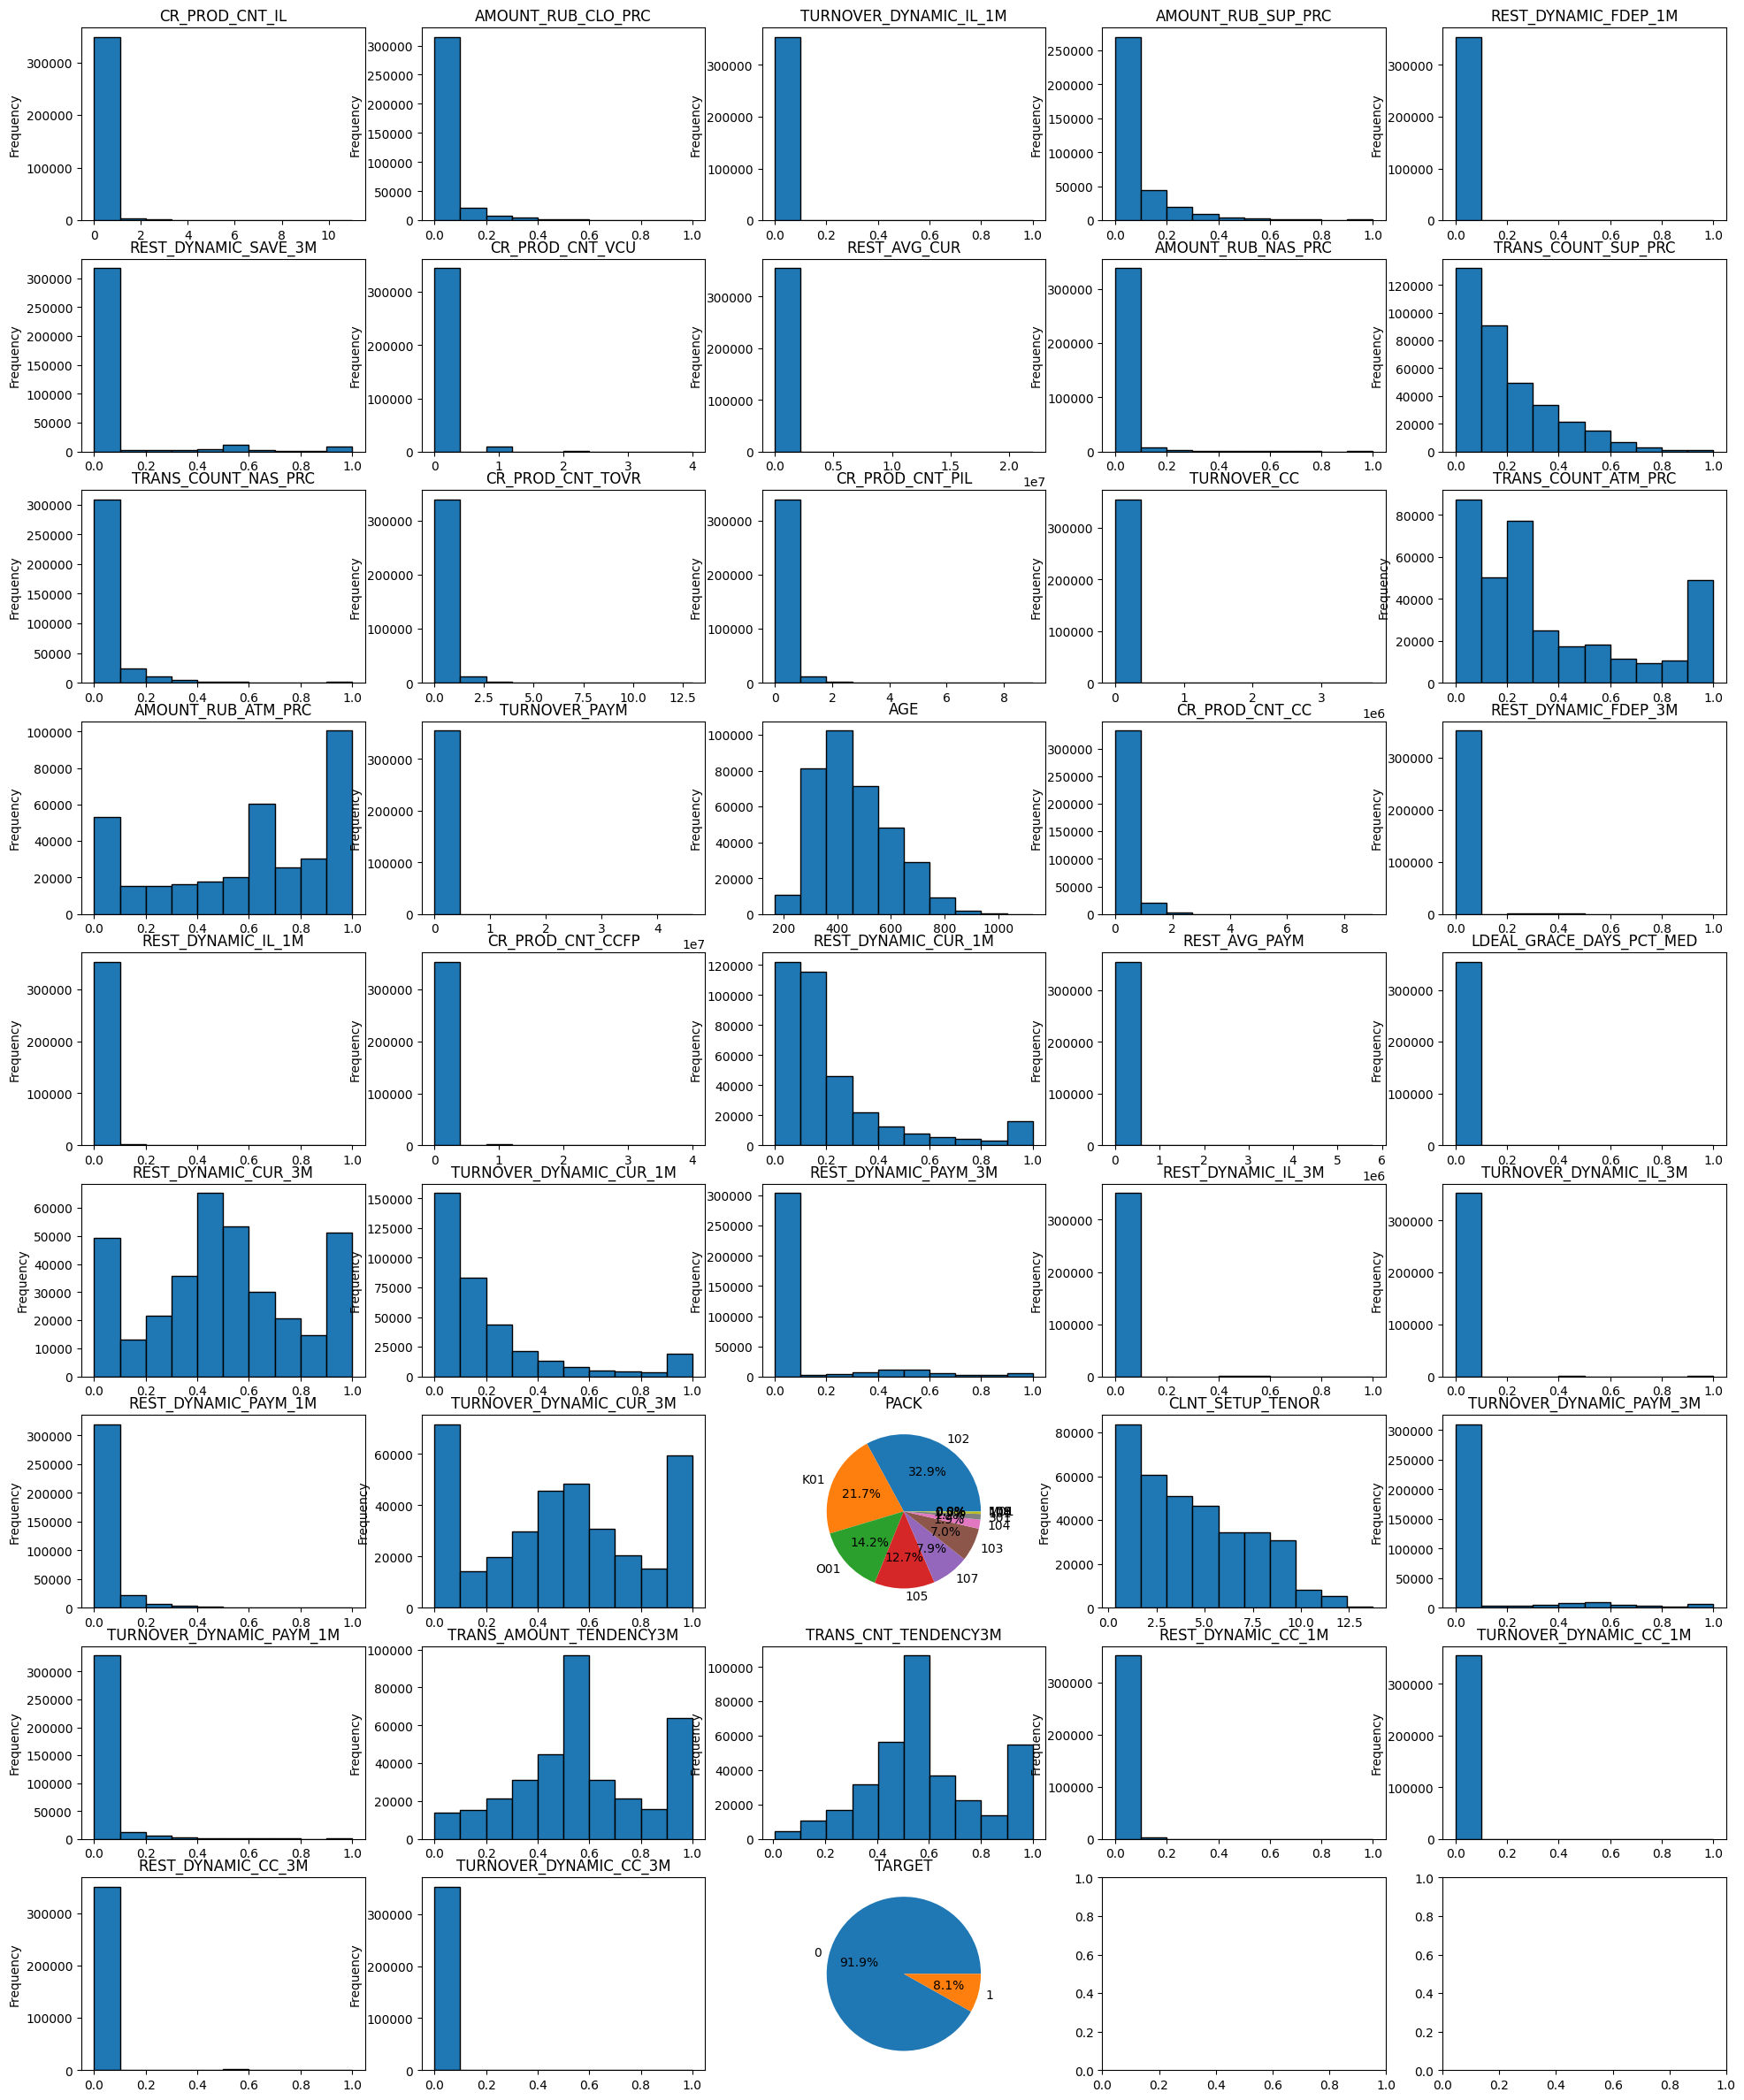

In [22]:
fig, axes = plt.subplots(9, 5, figsize=(24, 30))
for ax, col in zip(axes.flatten(), df_clean.drop('ID', axis=1).columns):
    ax.set_title(col)
    if col == 'PACK' or col == 'TARGET':
        ax.pie(df_clean[col].value_counts(), autopct="%1.1f%%", labels=df_clean[col].value_counts().index)
    else:
        df_clean[col].plot(kind="hist", ec="black", ax=ax)

### TARGET Distrebution

In [23]:
df_clean.TARGET.value_counts()

0    326265
1     28925
Name: TARGET, dtype: int64

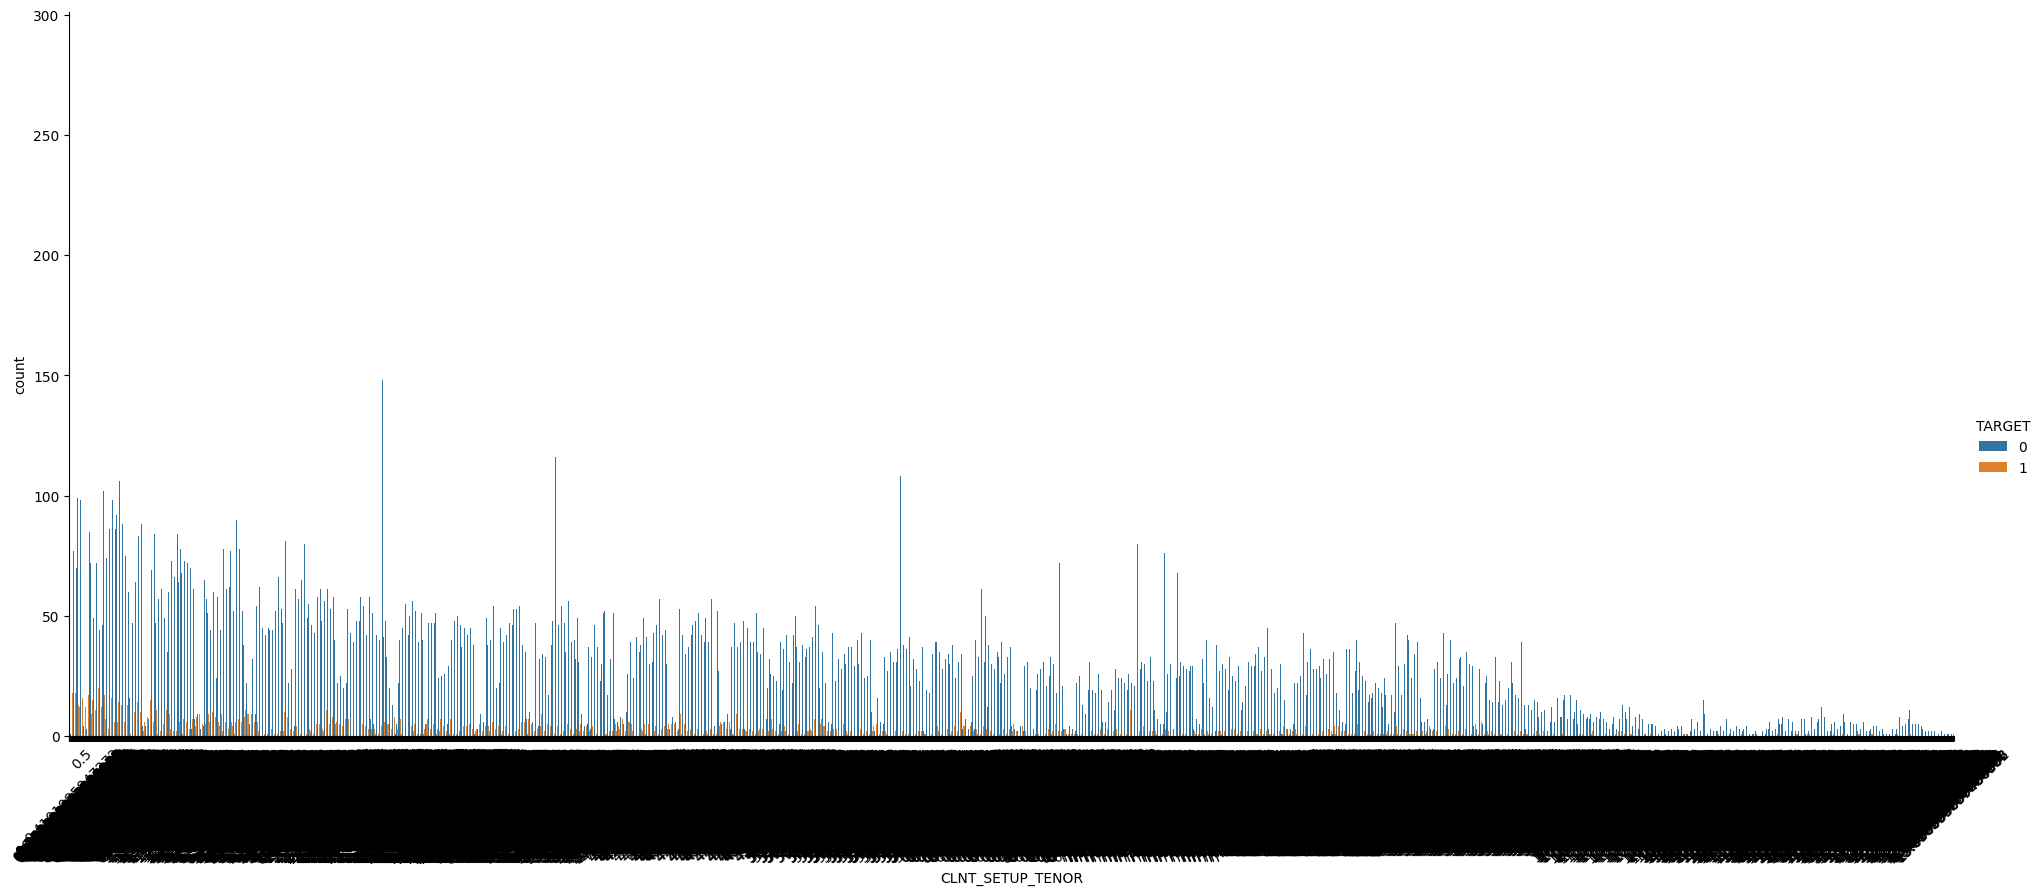

In [65]:
sns.catplot(data=df_clean[df_clean['CLNT_SETUP_TENOR'] < 24], x="CLNT_SETUP_TENOR", hue="TARGET", kind="count", height=8, aspect=20/8)
plt.xticks(rotation=45);

## TRAIN TEST SPLIT

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(['TARGET', 'ID'], axis=1), df_clean['TARGET'], test_size=0.2, stratify=df_clean['TARGET'])

In [146]:
list_ohe_features = ['PACK']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded = encoder.fit(X_train[list_ohe_features])

X_train_ohe = pd.DataFrame(encoder.transform(X_train[list_ohe_features]), columns=encoded.get_feature_names_out())
X_train = pd.concat([X_train.reset_index(), X_train_ohe.reset_index()], axis=1).drop(['index'], axis=1)
X_train.drop(list_ohe_features, axis=1, inplace=True)

X_test_ohe = pd.DataFrame(encoder.transform(X_test[list_ohe_features]), columns=encoded.get_feature_names_out())
X_test = pd.concat([X_test.reset_index(), X_test_ohe.reset_index()], axis=1).drop(['index'], axis=1)
X_test.drop(list_ohe_features, axis=1, inplace=True)

In [147]:
scl = StandardScaler()
scl.fit(X_train.iloc[:,:-12])

X_train = pd.concat([pd.DataFrame(scl.transform(X_train.iloc[:,:-12]), columns=scl.get_feature_names_out()),
                     X_train.iloc[:,-12:]], axis=1)

X_test = pd.concat([pd.DataFrame(scl.transform(X_test.iloc[:,:-12]), columns=scl.get_feature_names_out()),
                    X_test.iloc[:,-12:]], axis=1)

In [49]:
X_train

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,PACK_103,PACK_104,PACK_105,PACK_107,PACK_108,PACK_109,PACK_301,PACK_K01,PACK_M01,PACK_O01
0,-0.244287,-0.380354,-0.044882,-0.562264,-0.052995,-0.312406,-0.170374,-0.158544,-0.147964,-0.875860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.244287,-0.358286,-0.044882,-0.031390,-0.052995,-0.312406,-0.170374,-0.358545,-0.211607,0.435063,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.244287,1.827718,-0.044882,-0.063462,-0.052995,-0.312406,-0.170374,0.076017,-0.174598,0.679209,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.244287,-0.142879,-0.044882,-0.154335,-0.052995,-0.312406,-0.170374,-0.358545,0.469133,-0.405599,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.244287,-0.380354,-0.044882,-0.382890,-0.052995,-0.312406,-0.170374,-0.337029,-0.248490,-0.211962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284147,-0.244287,-0.380354,-0.044882,-0.582028,-0.052995,-0.312406,-0.170374,-0.195000,-0.239042,-1.004114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284148,2.068146,-0.380354,-0.044882,-0.464615,-0.052995,-0.312406,-0.170374,-0.358545,-0.181904,-0.514420,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284149,-0.244287,-0.380354,-0.044882,-0.582028,-0.052995,-0.312406,-0.170374,-0.358545,-0.248490,-1.004114,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284150,-0.244287,-0.380354,-0.044882,-0.327982,-0.052995,-0.312406,-0.170374,-0.193332,0.284236,0.791431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train.iloc[:2,-12:]

,PACK_101,PACK_102,PACK_103,PACK_104,PACK_105,PACK_107,PACK_108,PACK_109,PACK_301,PACK_K01,PACK_M01,PACK_O01
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


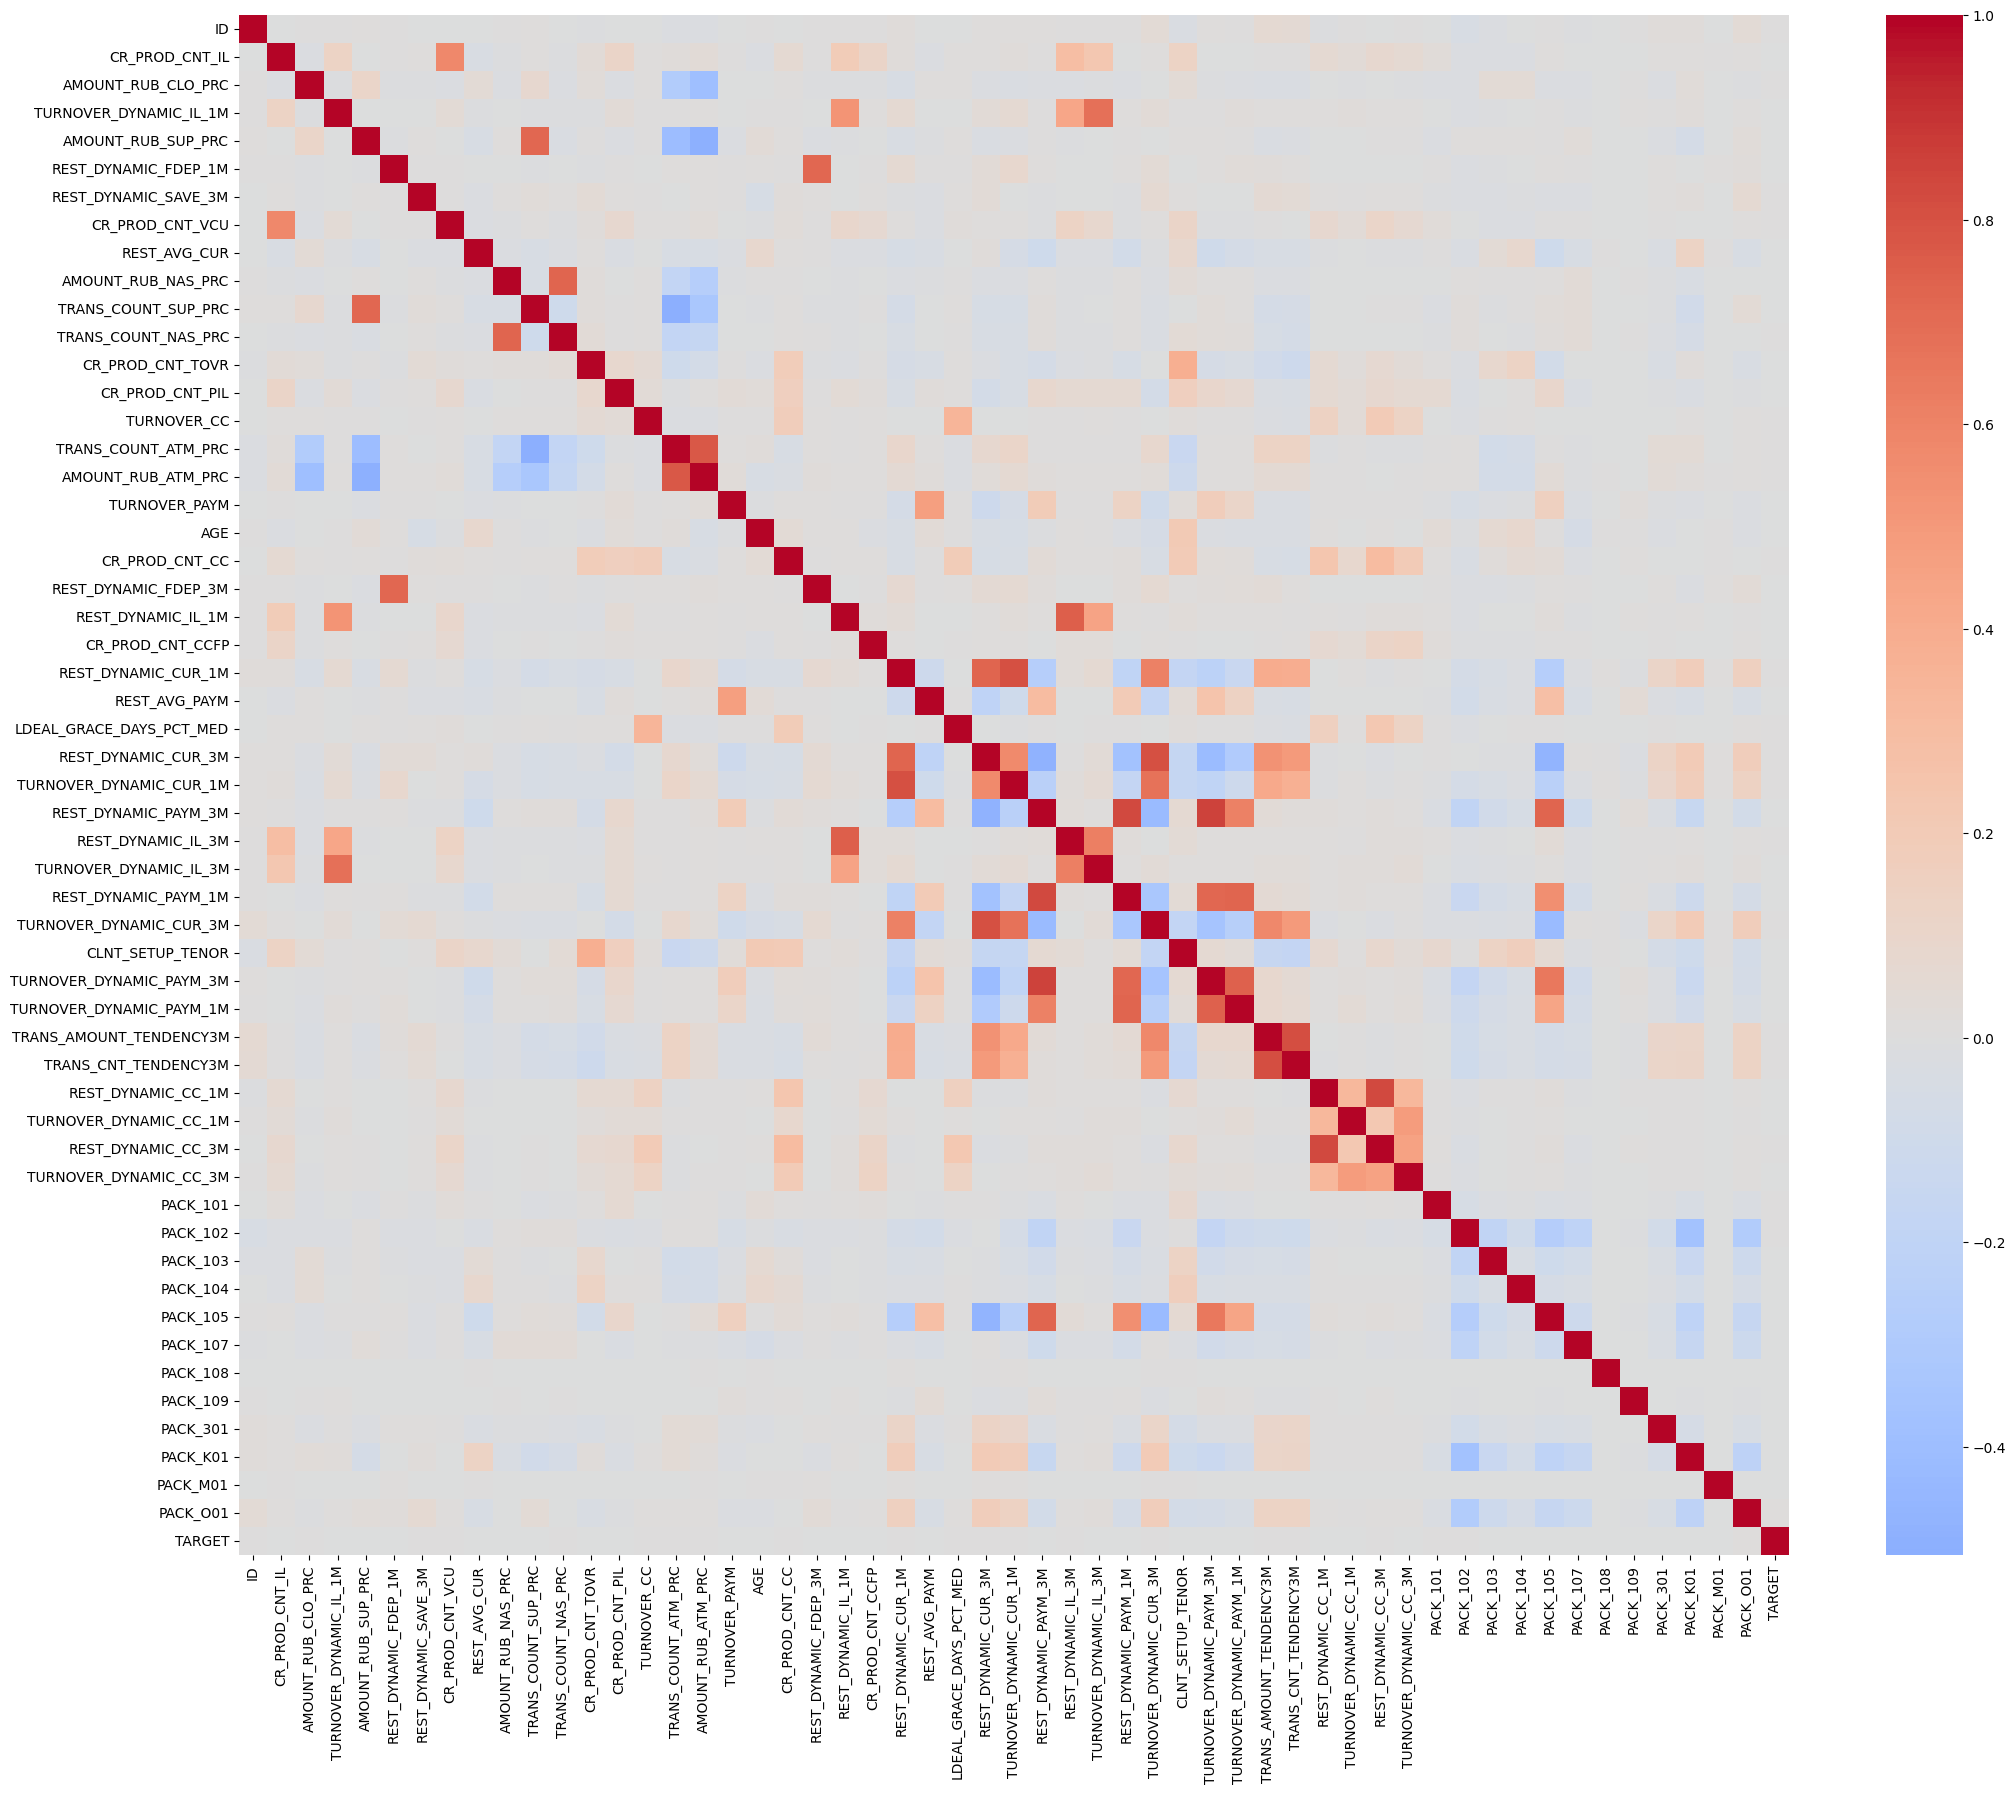

In [71]:
sns.heatmap(data=pd.concat([X_train, y_train], axis=1).corr(),
            annot=False,
            cmap="coolwarm",
            center=0,
            ax=plt.subplots(figsize=(25,20))[1]);

# Machine Learning

In [109]:
np.unique(y_test.values)

array([0, 1])

## Baseline. Naive classifier where you use the most popular class for predictions.

In [110]:
y_pred = y_test.apply(lambda x: 0)
naive_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Classifier Accuracy: {naive_accuracy:.3f}")

Naive Classifier Accuracy: 0.919


In [111]:
naive_auc = roc_auc_score(y_test, y_pred)
print(f"Naive Classifier AUC: {naive_auc}")

Naive Classifier AUC: 0.5


## RandomForestClassifier

In [86]:
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [50, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.2min
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.2min
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 6.0min
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 5.8min
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 1.2min
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 1.2min
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time= 7.3min
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time= 7.4min
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=50, min

In [112]:
rf_params = grid_search.best_params_

In [113]:
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10)

In [114]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f"Random Forest Classifier AUC: {rf_auc:.3f}")

Random Forest Classifier AUC: 0.834


In [115]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.3f}")

Random Forest Classifier Accuracy: 0.919


## MLP

In [151]:
mlp_params = {'alpha': [0.1], 'solver': ['sgd'], 'learning_rate_init': [0.01], 'max_iter': [1000], 'hidden_layer_sizes': [(100,16)], 'verbose': 1}
# alpha=0.1, solver='sgd', learning_rate_init=0.01, max_iter=1000, hidden_layer_sizes=(100,16), verbose=1
mlp = MLPClassifier(**mlp_params)
mlp.fit(X_train, y_train)

In [116]:
mlp_sklearn_auc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
print(f"MLP sklearn AUC: {mlp_sklearn_auc:.3f}")

MLP sklearn AUC: 0.814


In [117]:
mlp_sklearn_accuracy = mlp.score(X_test, y_test)
print(f"MLP sklearn AUC: {mlp_sklearn_accuracy:.3f}")

MLP sklearn AUC: 0.919


## Keras. Solve the task using Keras from the TensorFlow library.

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

In [130]:
keras_params = {'epochs': 100, 'batch_size': 32, 'verbose': 1}

In [132]:
model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
8880/8880 [==============================] - 23s 2ms/step - loss: 0.2874 - accuracy: 0.9141
Epoch 2/10
8880/8880 [==============================] - 18s 2ms/step - loss: 0.2618 - accuracy: 0.9185
Epoch 3/10
8880/8880 [==============================] - 20s 2ms/step - loss: 0.2573 - accuracy: 0.9183
Epoch 4/10
8880/8880 [==============================] - 21s 2ms/step - loss: 0.2548 - accuracy: 0.9184
Epoch 5/10
8880/8880 [==============================] - 29s 3ms/step - loss: 0.2534 - accuracy: 0.9184
Epoch 6/10
8880/8880 [==============================] - 19s 2ms/step - loss: 0.2519 - accuracy: 0.9183
Epoch 7/10
8880/8880 [==============================] - 20s 2ms/step - loss: 0.2513 - accuracy: 0.9184
Epoch 8/10
8880/8880 [==============================] - 19s 2ms/step - loss: 0.2508 - accuracy: 0.9184
Epoch 9/10
8880/8880 [==============================] - 20s 2ms/step - loss: 0.2499 - accuracy: 0.9183
Epoch 10/10
8880/8880 [==============================] - 19s 2ms/step - l

In [133]:
_, mlp_keras_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % mlp_keras_accuracy)

y_pred_prob = model.predict(X_test)
mlp_keras_auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: %.3f' % mlp_keras_auc)

Accuracy: 0.919
2220/2220 [==============================] - 3s 1ms/step
AUC: 0.801


## NumPy.
Implement the best architecture that you achieved earlier but with NumPy using matrix calculations. You need to train the model and use it for inference (predictions).

In [134]:
class CrossEntropy():
    def __init__(self): pass

    def loss(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

    def gradient(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)

class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

class Softmax():
    def __call__(self, x):
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)

    def gradient(self, x):
        p = self.__call__(x)
        return p * (1 - p)

In [135]:
import math

class MultilayerPerceptron():
    def __init__(self, n_hidden, n_iterations=1000, learning_rate=0.01):
        self.n_hidden = n_hidden
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.hidden_activation = Sigmoid()
        self.output_activation = Softmax()
        self.loss = CrossEntropy()

    def _initialize_weights(self, X, y):
        n_samples, n_features = X.shape
        _, n_outputs = y.shape
        # Hidden layer
        limit   = 1 / math.sqrt(n_features)
        self.W  = np.random.uniform(-limit, limit, (n_features, self.n_hidden))
        self.w0 = np.zeros((1, self.n_hidden))
        # Output layer
        limit   = 1 / math.sqrt(self.n_hidden)
        self.V  = np.random.uniform(-limit, limit, (self.n_hidden, n_outputs))
        self.v0 = np.zeros((1, n_outputs))

    def fit(self, X, y):

        self._initialize_weights(X, y)

        for i in range(self.n_iterations):
            # HIDDEN LAYER
            hidden_inp = X.dot(self.W) + self.w0
            hidden_out = self.hidden_activation(hidden_inp)
            # OUTPUT LAYER
            output_layer_input = hidden_out.dot(self.V) + self.v0
            y_pred = self.output_activation(output_layer_input)


            # OUTPUT LAYER
            grad_wrt_out_l_input = self.loss.gradient(y, y_pred) * self.output_activation.gradient(output_layer_input)
            grad_v = hidden_out.T.dot(grad_wrt_out_l_input)
            grad_v0 = np.sum(grad_wrt_out_l_input, axis=0, keepdims=True)
            # HIDDEN LAYER
            grad_wrt_hidden_l_input = grad_wrt_out_l_input.dot(self.V.T) * self.hidden_activation.gradient(hidden_inp)
            grad_w = X.T.dot(grad_wrt_hidden_l_input)
            grad_w0 = np.sum(grad_wrt_hidden_l_input, axis=0, keepdims=True)

            self.V  -= self.learning_rate * grad_v
            self.v0 -= self.learning_rate * grad_v0
            self.W  -= self.learning_rate * grad_w
            self.w0 -= self.learning_rate * grad_w0

    def predict(self, X):
        hidden_inp = X.dot(self.W) + self.w0
        hidden_out = self.hidden_activation(hidden_inp)
        output_layer_input = hidden_out.dot(self.V) + self.v0
        y_pred = self.output_activation(output_layer_input)
        return y_pred

In [149]:
clf_params = {'n_hidden': 16, 'n_iterations': 100, 'learning_rate': 0.01}
clf = MultilayerPerceptron(n_hidden=16,
        n_iterations=1000,
        learning_rate=0.01)

clf.fit(X_train.values, y_train.values.reshape(-1,1))

In [148]:
y_pred = np.argmax(clf.predict(X_test.values), axis=1)
y_test = y_test.values.reshape(-1,1)

np_mlp_accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy: {np_mlp_accuracy:.3f}')

np_mlp_auc = roc_auc_score(y_test, y_pred)
print (f'AUC: {np_mlp_auc:.3f}')

Accuracy: 0.919
AUC: 0.500


# Predict fo TEST dataset

In [88]:
df_test.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,400980,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,525062,0,0.059381,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,0.5,0.5,0.0,0.0,0.5,0.5,0.5,NaN
2,280316,0,0.070430,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,496066,0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,375031,0,0.180961,0.0,77.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [101]:
cols = df_clean.columns.tolist()
df_test_ready = df_test[cols]
X = df_test_ready.drop(['ID', 'TARGET'], axis=1)

In [102]:
X_ohe = pd.DataFrame(encoder.transform(X[list_ohe_features]), columns=encoded.get_feature_names_out())
X = pd.concat([X.reset_index(), X_ohe.reset_index()], axis=1).drop(['index'], axis=1)
X.drop(list_ohe_features, axis=1, inplace=True)

In [103]:
X = pd.concat([pd.DataFrame(scl.transform(X.iloc[:,:-12]), columns=scl.get_feature_names_out()),
                    X.iloc[:,-12:]], axis=1)

In [104]:
X.fillna(0, inplace=True)

In [105]:
res = pd.DataFrame(mlp.predict(X), columns=['TARGET'])
res['ID'] = df_test['ID']

In [107]:
res.TARGET.value_counts()

0    88687
1      111
Name: TARGET, dtype: int64

In [108]:
res.to_csv('/content/predictions.csv')

# Result table

In [152]:
results = pd.DataFrame({
    'Library': ['Naive', 'Random Forest', 'Scikit-learn MLP', 'Keras MLP', 'TensorFlow MLP', 'NumPy MLP'],
    'Algorithm': ['Naive Classifier', 'Random Forest', 'MLPClassifier', 'MLP', 'MLP', 'MLP'],
    'Hyperparameters': ['N/A', rf_params, mlp_params, keras_params, keras_params, clf_params],
    'Accuracy': [naive_accuracy, rf_accuracy, mlp_sklearn_accuracy, mlp_keras_accuracy, mlp_keras_accuracy, np_mlp_accuracy],
    'AUC': [naive_auc, rf_auc, mlp_sklearn_auc, mlp_keras_auc, mlp_keras_auc, np_mlp_auc]
})

In [153]:
results

,Library,Algorithm,Hyperparameters,Accuracy,AUC
0,Naive,Naive Classifier,N/A,0.918565,0.500000
1,Random Forest,Random Forest,"{'max_depth': 50, 'min_samples_leaf': 2, 'min_...",0.919395,0.833596
2,Scikit-learn MLP,MLPClassifier,"{'alpha': [0.1], 'solver': ['sgd'], 'learning_...",0.918959,0.814188
3,Keras MLP,MLP,"{'epochs': 100, 'batch_size': 32, 'verbose': 1}",0.918635,0.800903
4,TensorFlow MLP,MLP,"{'epochs': 100, 'batch_size': 32, 'verbose': 1}",0.918635,0.800903
5,NumPy MLP,MLP,"{'n_hidden': 16, 'n_iterations': 100, 'learnin...",0.918565,0.500000
